<a href="https://colab.research.google.com/github/asyraffff/eICU-UMMC-Length-Of-Stay-Prediction/blob/main/2_UMMC_Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Flatten, Dense, SimpleRNN, LSTM, GRU, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

# import warning library to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option("display.max_rows", None)

In [ ]:
df_ppum = pd.read_csv("drive/My Drive/FYP_LOS/dataset/data_ppum.csv", low_memory=False)
df_cardiac_ed = pd.read_csv("drive/My Drive/FYP_LOS/dataset/cardiac_ed.csv", low_memory=False)
df_cardiac_ed_no_outliers = pd.read_csv("drive/My Drive/FYP_LOS/dataset/cardiac_ed_no_outliers.csv", low_memory=False)
df_cardiac_ed_quantile = pd.read_csv("drive/My Drive/FYP_LOS/dataset/cardiac_ed_quantile.csv", low_memory=False)

df_ppum_cleaned = pd.read_csv("drive/My Drive/FYP_LOS/dataset/cardiac_ed_ppum.csv", low_memory=False)
test_ppum = pd.read_csv("drive/My Drive/FYP_LOS/test_ppum.csv", low_memory=False)

In [ ]:
df_ppum.head()

record_id  patient_rn  cardiac_patient_ed  sociodemo_age  sociodemo_gender  sociodemo_ethnicity sociodemo_ethnicity_other  sociodemo_citizenship sociodemo_citizens_nonmalaysian  sociodemo_modeofarrival  first_triage  at_present_temp  at_present_rr  atpresent_spo2  atpresent_spo2_under  atpresent_sbp  atpresent_dbp  atpresent_hr  atpresent_painscore  vs1hour_temp  vs1hour_rr  vs1hour_spo2  vs1hour_spo2under  vs1hour_hr  vs1hour_sbp  vs1hour_dbp  vs1hour_painscore  vs4hour_temp  vs4hour_rr  vs4hour_spo2  vs4hour_spo2under  vs4hour_hr  vs4hour_sbp  vs4hour_dbp  vs4hour_painscore  signsymptom_chestpain  signsymptom_chestheaviness  signsymptom_painradiation  signsymptom_sob  signsymptom_diaphoresis  signsymptom_exertionalsdyspnoea  signsymptom_palpitation  signsymptom_syncope  signsymptom_fatigue  signsymptom_headache  signsymptom_fever  signsymptom_alteredconsciousness  signsymptom_confusion  signsymptom_seizure  signsymptom_seizures  signsymptom_nausea  signsymptom_vomiting  \
0          1  37097803.0                 0.0           82.0               2.0                  2.0                       NaN                    1.0                             NaN                      1.0           2.0              NaN           19.0            99.0                   1.0          131.0           52.0          71.0                  NaN           NaN         NaN           NaN                NaN         NaN          NaN          NaN                NaN           NaN         NaN           NaN                NaN         NaN          NaN          NaN                NaN                    0.0                         1.0                        0.0              1.0                      0.0                              0.0                      1.0                  0.0                  1.0                   0.0                0.0                               0.0                    0.0                  0.0                   0.0                 0.0                   0.0   
1          2  23499281.0                 NaN           66.0               1.0                  1.0                       NaN                    1.0                             NaN                      1.0           2.0              NaN            NaN           100.0                   NaN          206.0           87.0          53.0                  NaN           NaN         NaN         100.0                1.0        58.0        131.0         73.0                NaN           NaN         NaN           NaN                NaN         NaN          NaN          NaN                NaN                    1.0                         1.0                        0.0              0.0                      NaN                              0.0                      0.0                  0.0                  0.0                   0.0                0.0                               0.0                    0.0                  0.0                   0.0                 0.0                   0.0   
2          3         NaN                 NaN           45.0               1.0                  1.0                       NaN                    1.0                             NaN                      1.0           1.0             36.8           18.0            98.0                   NaN          155.0          102.0         105.0                  8.0           NaN        18.0          98.0                1.0        91.0        117.0         97.0                NaN           NaN        14.0           NaN                1.0        96.0        148.0        122.0                NaN                    1.0                         1.0                        1.0              0.0                      NaN                              0.0                      0.0                  0.0                  0.0                   0.0                0.0                               0.0                    0.0                  0.0                   0.0                 0.0                   0.0   
3          4         NaN           

In [ ]:
df_ppum.describe(include='all')

record_id    patient_rn  cardiac_patient_ed  sociodemo_age  sociodemo_gender  sociodemo_ethnicity sociodemo_ethnicity_other  sociodemo_citizenship sociodemo_citizens_nonmalaysian  sociodemo_modeofarrival  first_triage  at_present_temp  at_present_rr  atpresent_spo2  atpresent_spo2_under  atpresent_sbp  atpresent_dbp  atpresent_hr  atpresent_painscore  vs1hour_temp  vs1hour_rr  vs1hour_spo2  vs1hour_spo2under  vs1hour_hr  vs1hour_sbp  vs1hour_dbp  vs1hour_painscore  vs4hour_temp  vs4hour_rr  vs4hour_spo2  vs4hour_spo2under  vs4hour_hr  vs4hour_sbp  vs4hour_dbp  vs4hour_painscore  signsymptom_chestpain  signsymptom_chestheaviness  signsymptom_painradiation  signsymptom_sob  signsymptom_diaphoresis  signsymptom_exertionalsdyspnoea  signsymptom_palpitation  signsymptom_syncope  signsymptom_fatigue  signsymptom_headache  signsymptom_fever  signsymptom_alteredconsciousness  signsymptom_confusion  signsymptom_seizure  signsymptom_seizures  signsymptom_nausea  signsymptom_vomiting  \
count   70.000000  6.500000e+01           60.000000      69.000000         69.000000            69.000000                         4              69.000000                               3                59.000000     69.000000        21.000000      43.000000       56.000000             51.000000      55.000000      55.000000     54.000000            32.000000      2.000000   17.000000     22.000000          24.000000   22.000000    22.000000    22.000000          11.000000     18.000000   32.000000     41.000000          39.000000   42.000000    42.000000    42.000000          16.000000              58.000000                   58.000000                  58.000000        58.000000                53.000000                        58.000000                58.000000            58.000000            58.000000             58.000000               58.0                         58.000000                   58.0                 58.0             58.000000           58.000000             58.000000   
unique        NaN           NaN                 NaN            NaN               NaN                  NaN                         3                    NaN                               2                      NaN           NaN              NaN            NaN             NaN                   NaN            NaN            NaN           NaN                  NaN           NaN         NaN           NaN                NaN         NaN          NaN          NaN                NaN           NaN         NaN           NaN                NaN         NaN          NaN          NaN                NaN                    NaN                         NaN                        NaN              NaN                      NaN                              NaN                      NaN                  NaN                  NaN                   NaN                NaN                               NaN                    NaN                  NaN                   NaN                 NaN                   NaN   
top           NaN           NaN                 NaN            NaN               NaN                  NaN                Indonesian                    NaN                      Indonesian                      NaN           NaN              NaN            NaN             NaN                   NaN            NaN            NaN           NaN                  NaN           NaN         NaN           NaN                NaN         NaN          NaN          NaN                NaN           NaN         NaN           NaN                NaN         NaN          NaN          NaN                NaN                    NaN                         NaN                        NaN              NaN                      NaN                              NaN                      NaN                  NaN                  NaN                   NaN                NaN                               NaN                    NaN                  NaN                   NaN                 NaN                   NaN   
freq        

## Column selection

**Public Data vs PPUM Data**

*   cardiac_patient_ed : 1
*   gender             : sociodemo_gender
*   age                : sociodemo_age
*   BMI                : (DATA NOT COLLECTED)
*   diagnosis_code     : diagnosis_provisional/diagnosis_provisional_2/diagnosis_provisional/3
*   LOS                : decision_discharge_date_time - triage_date_time
*   intubated          : ed_intubation
*   vent               : (same with ed_intubation)
*   dialysis           : (DATA NOT COLLECTED)
*   eyes               : (DATA NOT COLLECTED)
*   motor              : (DATA NOT COLLECTED)
*   verbal             : (DATA NOT COLLECTED)
*   GCS                : (DATA NOT COLLECTED)
*   urine             :  (DATA NOT COLLECTED)
*   wbc                : value_wcc
*   temperature        : at_present_temp
*   respiratoryrate    : at_present_rr
*   heartrate          : atpresent_hr
*   sodium             : value_sodium
*   meanbp             : atpresent_sbp/atpresent_dbp ( meanbp = DBP + 1/3 (SBP-DBP))
*   hematocrit         : value_haematocrit
*   creatinine         : lab_creatinine_2
*   albumin            : value_albumin
*   bun               :  value_urea
*   glucose            : value_glucose
*   bilirubin         :  value_totalbilirubin
*   thrombolytics     :  medication_streptokinase
*   aids              :  (DATA NOT COLLECTED)
*   hepaticfailure    :  (DATA NOT COLLECTED)
*   lymphoma          :  (DATA NOT COLLECTED)
*   metastaticcancer  :  comorbid_cancer_active
*   cirrhosis         :  comorbid_liver_disease
*   diabetes          :  comorbid_dmtype2

In [ ]:
df_cardiac_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13801 entries, 0 to 13800
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            13801 non-null  int64  
 1   age               13801 non-null  float64
 2   diagnosis_code    13801 non-null  int64  
 3   LOS               13801 non-null  float64
 4   intubated         13801 non-null  float64
 5   wbc               13801 non-null  float64
 6   respiratoryrate   13801 non-null  float64
 7   heartrate         13801 non-null  float64
 8   sodium            13801 non-null  float64
 9   meanbp            13801 non-null  float64
 10  hematocrit        13801 non-null  float64
 11  creatinine        13801 non-null  float64
 12  bun               13801 non-null  float64
 13  glucose           13801 non-null  float64
 14  thrombolytics     13801 non-null  float64
 15  metastaticcancer  13801 non-null  float64
 16  cirrhosis         13801 non-null  float6

In [ ]:
# column selection
df_ppum = df_ppum[['patient_rn' ,'cardiac_patient_ed', 'sociodemo_gender', 'sociodemo_age', 'diagnosis_provisional',
                     'decision_discharge_date_time', 'triage_date_time', 'ed_intubation', 'value_wcc',
                     'at_present_rr', 'atpresent_hr', 'value_sodium', 'atpresent_sbp',
                     'atpresent_dbp', 'value_haematocrit', 'lab_creatinine_2', 'value_urea' ,
                     'value_glucose', 'medication_streptokinase',
                     'comorbid_cancer_active', 'comorbid_liver_disease', 'comorbid_dmtype2']]

df_ppum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_rn                    65 non-null     float64
 1   cardiac_patient_ed            60 non-null     float64
 2   sociodemo_gender              69 non-null     float64
 3   sociodemo_age                 69 non-null     float64
 4   diagnosis_provisional         56 non-null     object 
 5   decision_discharge_date_time  53 non-null     object 
 6   triage_date_time              52 non-null     object 
 7   ed_intubation                 56 non-null     float64
 8   value_wcc                     62 non-null     float64
 9   at_present_rr                 43 non-null     float64
 10  atpresent_hr                  54 non-null     float64
 11  value_sodium                  62 non-null     float64
 12  atpresent_sbp                 55 non-null     float64
 13  atprese

## Feature Engineering

In [ ]:
# List of patient_rn values where we want to change cardiac_patient_ed to 1
patients_to_update = [37109192]
# Update the rows where patient_rn is in patients_to_update and cardiac_patient_ed is null
df_ppum.loc[(df_ppum['patient_rn'].isin(patients_to_update)) & (df_ppum['cardiac_patient_ed'].isnull()), 'cardiac_patient_ed'] = 1

# Filter cardiac patient
df_ppum = df_ppum[df_ppum['cardiac_patient_ed'] == 1]

# diagnosis code
lb_make = LabelEncoder()
df_ppum['diagnosis_provisional'] = df_ppum['diagnosis_provisional'].astype('category')
df_ppum['diagnosis_code'] = lb_make.fit_transform(df_ppum['diagnosis_provisional'])

# Drop null values
columns_to_check = ['sociodemo_gender', 'diagnosis_code','diagnosis_provisional', 'decision_discharge_date_time', 'triage_date_time']
df_ppum = df_ppum.dropna(subset=columns_to_check) # Drop null values

# Mapping values and converting to int
df_ppum['sociodemo_gender'] = df_ppum['sociodemo_gender'].map({1: 0, 2: 1}).astype(int)

# LOS column
df_ppum['decision_discharge_date_time'] = pd.to_datetime(df_ppum['decision_discharge_date_time'])
df_ppum['triage_date_time'] = pd.to_datetime(df_ppum['triage_date_time'])
df_ppum['LOS'] = (df_ppum['decision_discharge_date_time'] - df_ppum['triage_date_time'])

df_ppum.drop(['decision_discharge_date_time', 'triage_date_time'], axis=1, inplace=True)

# Change LOS column type from datetime to float
df_ppum['LOS'] = df_ppum['LOS'].dt.total_seconds() / (24 * 3600)  # Convert timedelta to float days

# meanbp column
df_ppum['meanbp'] = df_ppum['atpresent_dbp'] + (1/3) * (df_ppum['atpresent_sbp'] - df_ppum['atpresent_dbp'])
df_ppum.drop(['atpresent_sbp', 'atpresent_dbp'], axis=1, inplace=True)

df_ppum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 6 to 69
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   patient_rn                30 non-null     float64 
 1   cardiac_patient_ed        30 non-null     float64 
 2   sociodemo_gender          30 non-null     int64   
 3   sociodemo_age             30 non-null     float64 
 4   diagnosis_provisional     30 non-null     category
 5   ed_intubation             30 non-null     float64 
 6   value_wcc                 30 non-null     float64 
 7   at_present_rr             23 non-null     float64 
 8   atpresent_hr              28 non-null     float64 
 9   value_sodium              30 non-null     float64 
 10  value_haematocrit         30 non-null     float64 
 11  lab_creatinine_2          30 non-null     float64 
 12  value_urea                30 non-null     float64 
 13  value_glucose             28 non-null     float64 
 

In [ ]:
# Table of Diagnosis code with its descriptions

# Drop duplicates to have unique combinations of diagnosis code and description
unique_df_dc = df_ppum.drop_duplicates().sort_values(by='diagnosis_code')

# Grouping by 'diagnosis_code' and aggregating 'apacheadmissiondx' descriptions
grouped_dc = unique_df_dc.groupby('diagnosis_code')['diagnosis_provisional'].apply(lambda x: '\n'.join(x))

print(grouped_dc.to_string())

diagnosis_code
0                     Acute Anteroseptal STEMI Killip 1
1     Acute Coronary Syndrome\nAcute Coronary Syndro...
2                     Acute Decompensated Heart Failure
3     Acute Decompensated Heart Failure secondary to...
4               Acute Heart Failure secondary to NSTEMI
5                            Ascites with UL ESRF HFrEF
6                             Cover for unstable angina
7                     Decompensated HF secondary to ACS
9                    Hypertensive Emergency with NSTEMI
10                               NSTEMI\nNSTEMI\nNSTEMI
11                    Syncopal attack for Investigation
12                                     TRO ACS\nTRO ACS
13                    TRO ACS (HEART score 2, Low risk)
14    Unstable Angina\nUnstable Angina\nUnstable Ang...
15    Unstable Angina TRO NSTEMI\nUnstable Angina TR...
16                       Unstable Angina, HEART Score 6


In [ ]:
# Rename columns
new_column_names = {
    'sociodemo_gender': 'gender',
    'sociodemo_age': 'age',
    'ed_intubation': 'intubated',
    'value_wcc' : 'wbc',
    'at_present_rr' : 'respiratoryrate',
    'atpresent_hr' : 'heartrate',
    'value_sodium' : 'sodium',
    'value_haematocrit' : 'hematocrit',
    'lab_creatinine_2' : 'creatinine',
    'value_urea' : 'bun',
    'value_glucose' : 'glucose',
    'medication_streptokinase' : 'thrombolytics',
    'comorbid_cancer_active' : 'metastaticcancer',
    'comorbid_liver_disease' : 'cirrhosis',
    'comorbid_dmtype2' : 'diabetes'
}

df_ppum.rename(columns=new_column_names, inplace=True)

**Mapping the PPUM diagnosis code data to Public diagnosis code data**

* 0 —> 47
* 1 —> 5
* 2 —> 15
* 3 —> 15
* 4 —> 15
* 5 —> 15
* 6 —> 5
* 7 —> 5, 15
* 9 -> 47
* 10 -> 47
* 11 -> X
* 12 —>5
* 13 —>5
* 14 —> 5
* 15 —> 5
* 16 —> 5

In [ ]:
# Mapping values and converting to int
df_ppum['diagnosis_code'] = df_ppum['diagnosis_code'].map({0: 47, 1: 5, 2: 15, 3: 15, 4:15,
                                                               5: 15, 6: 5, 7: 5, 9: 47, 10:47,
                                                               12: 5, 13: 5, 14: 5, 15: 5, 16: 5})

In [ ]:
# restructure columns
df_ppum = df_ppum[['gender', 'age', 'diagnosis_code', 'LOS', 'intubated', 'wbc',
                   'respiratoryrate', 'heartrate', 'sodium', 'meanbp',
                   'hematocrit', 'creatinine', 'bun', 'glucose', 'thrombolytics',
                   'metastaticcancer', 'cirrhosis', 'diabetes']]

# Drop null values on diagnosis code colummn
columns_to_check = ['diagnosis_code']
df_ppum = df_ppum.dropna(subset=columns_to_check) # Drop null values

df_ppum['diagnosis_code'] = df_ppum['diagnosis_code'].astype('int')

df_ppum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 6 to 69
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            29 non-null     int64  
 1   age               29 non-null     float64
 2   diagnosis_code    29 non-null     int64  
 3   LOS               29 non-null     float64
 4   intubated         29 non-null     float64
 5   wbc               29 non-null     float64
 6   respiratoryrate   22 non-null     float64
 7   heartrate         27 non-null     float64
 8   sodium            29 non-null     float64
 9   meanbp            28 non-null     float64
 10  hematocrit        29 non-null     float64
 11  creatinine        29 non-null     float64
 12  bun               29 non-null     float64
 13  glucose           27 non-null     float64
 14  thrombolytics     29 non-null     float64
 15  metastaticcancer  29 non-null     float64
 16  cirrhosis         29 non-null     float64
 17 

In [ ]:
df_cardiac_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13801 entries, 0 to 13800
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            13801 non-null  int64  
 1   age               13801 non-null  float64
 2   diagnosis_code    13801 non-null  int64  
 3   LOS               13801 non-null  float64
 4   intubated         13801 non-null  float64
 5   wbc               13801 non-null  float64
 6   respiratoryrate   13801 non-null  float64
 7   heartrate         13801 non-null  float64
 8   sodium            13801 non-null  float64
 9   meanbp            13801 non-null  float64
 10  hematocrit        13801 non-null  float64
 11  creatinine        13801 non-null  float64
 12  bun               13801 non-null  float64
 13  glucose           13801 non-null  float64
 14  thrombolytics     13801 non-null  float64
 15  metastaticcancer  13801 non-null  float64
 16  cirrhosis         13801 non-null  float6

## Missing values

In [ ]:
!pip install missingno

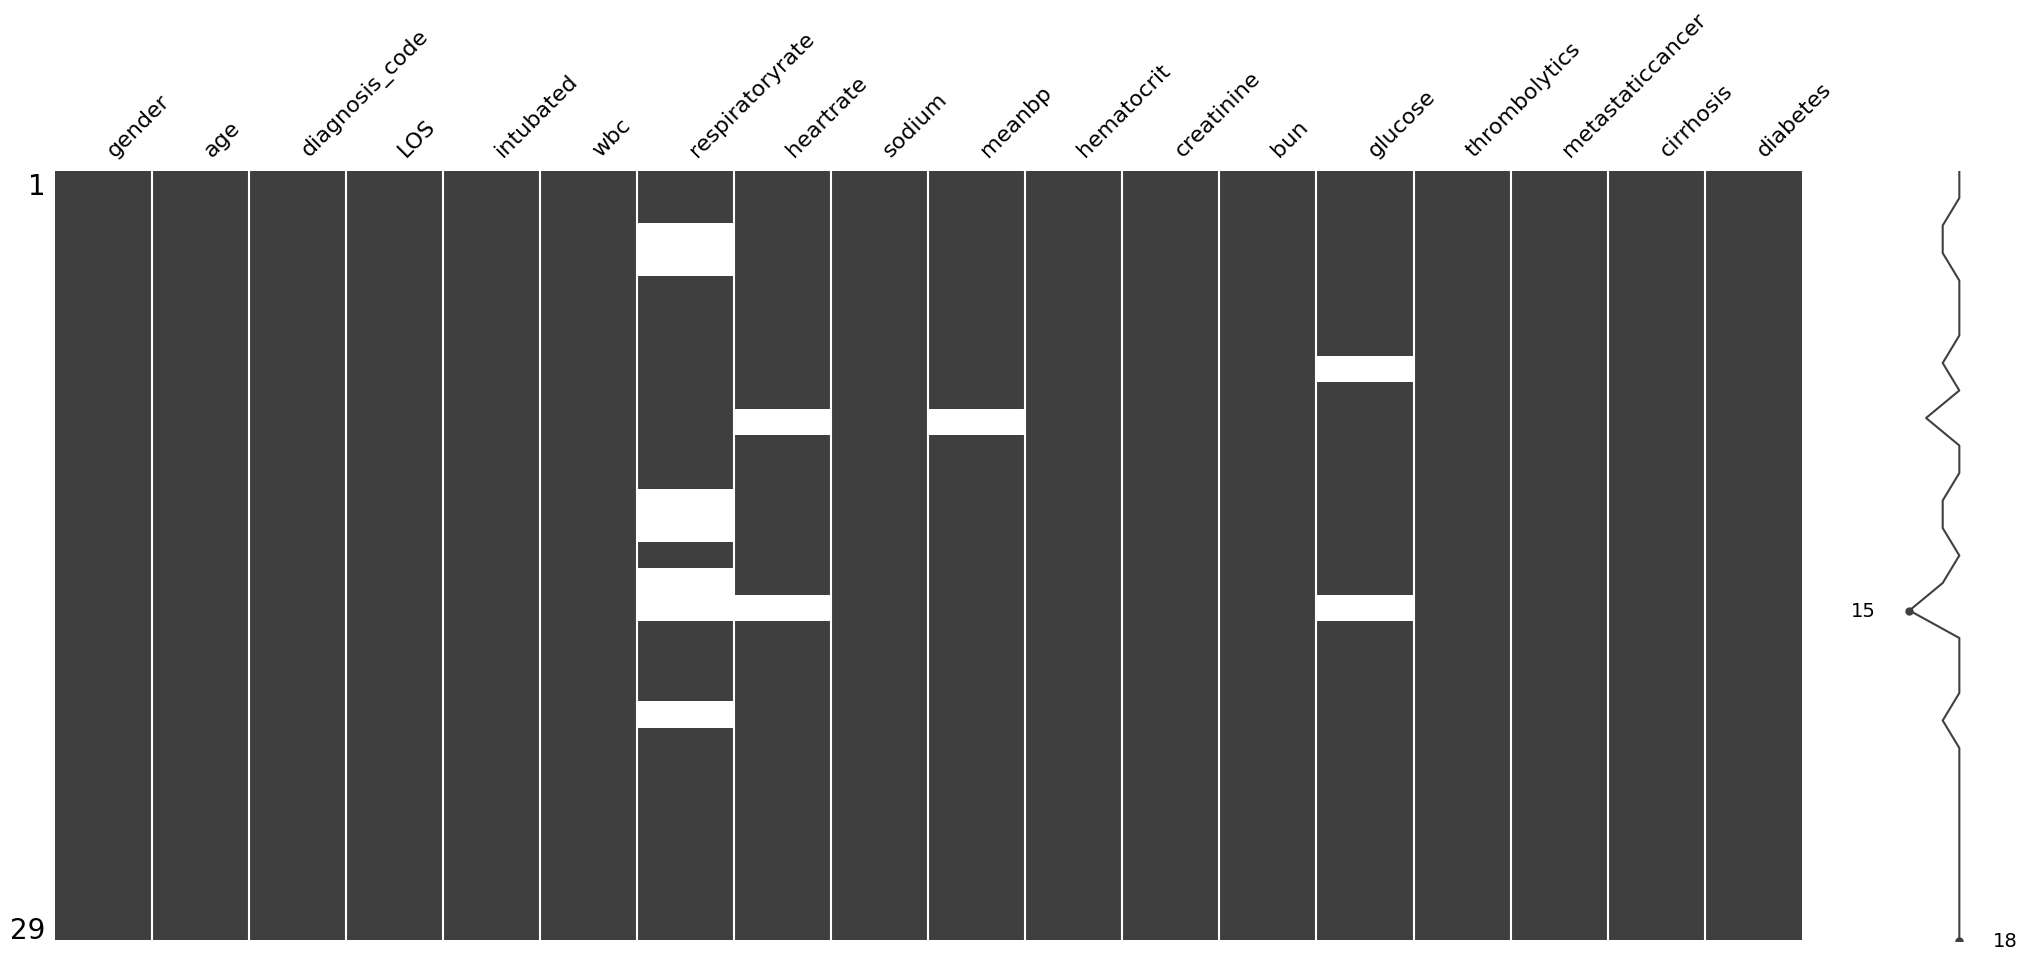

In [ ]:
import missingno as msno

msno.matrix(df_ppum);

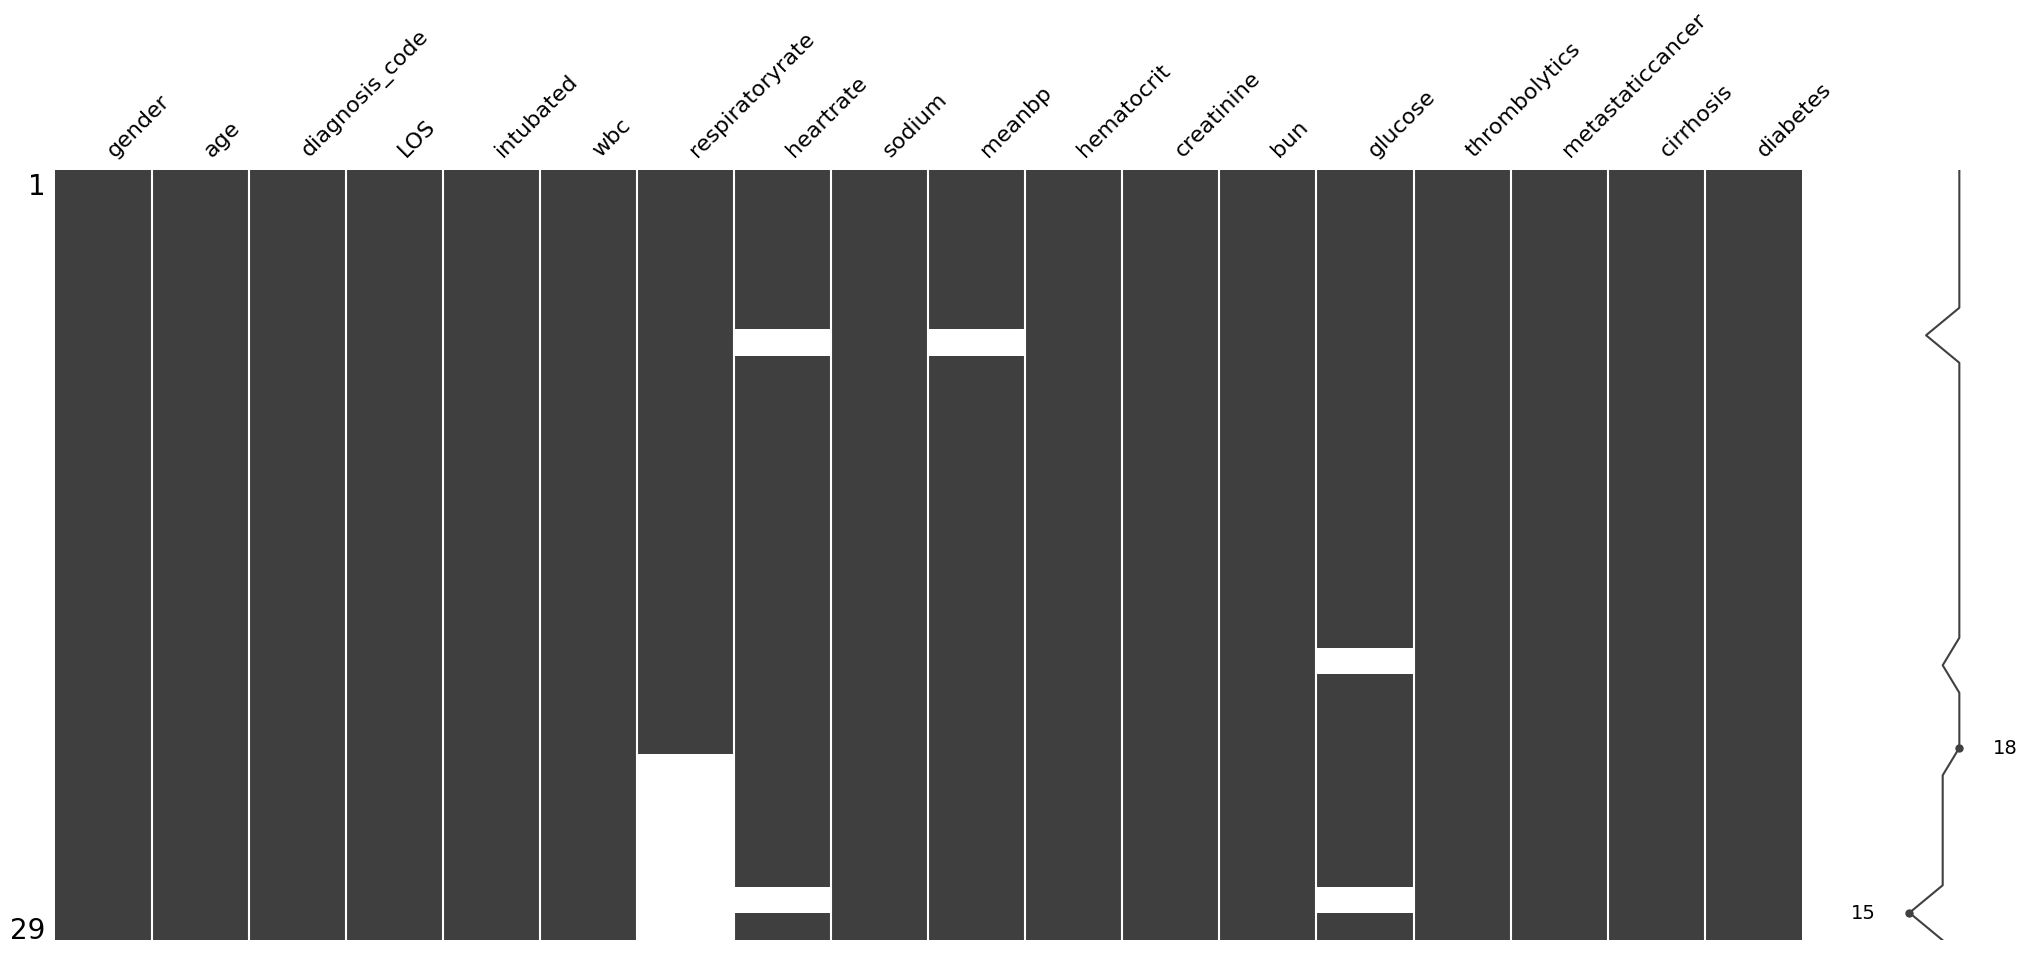

In [ ]:
msno.matrix(df_ppum.sort_values("respiratoryrate"));

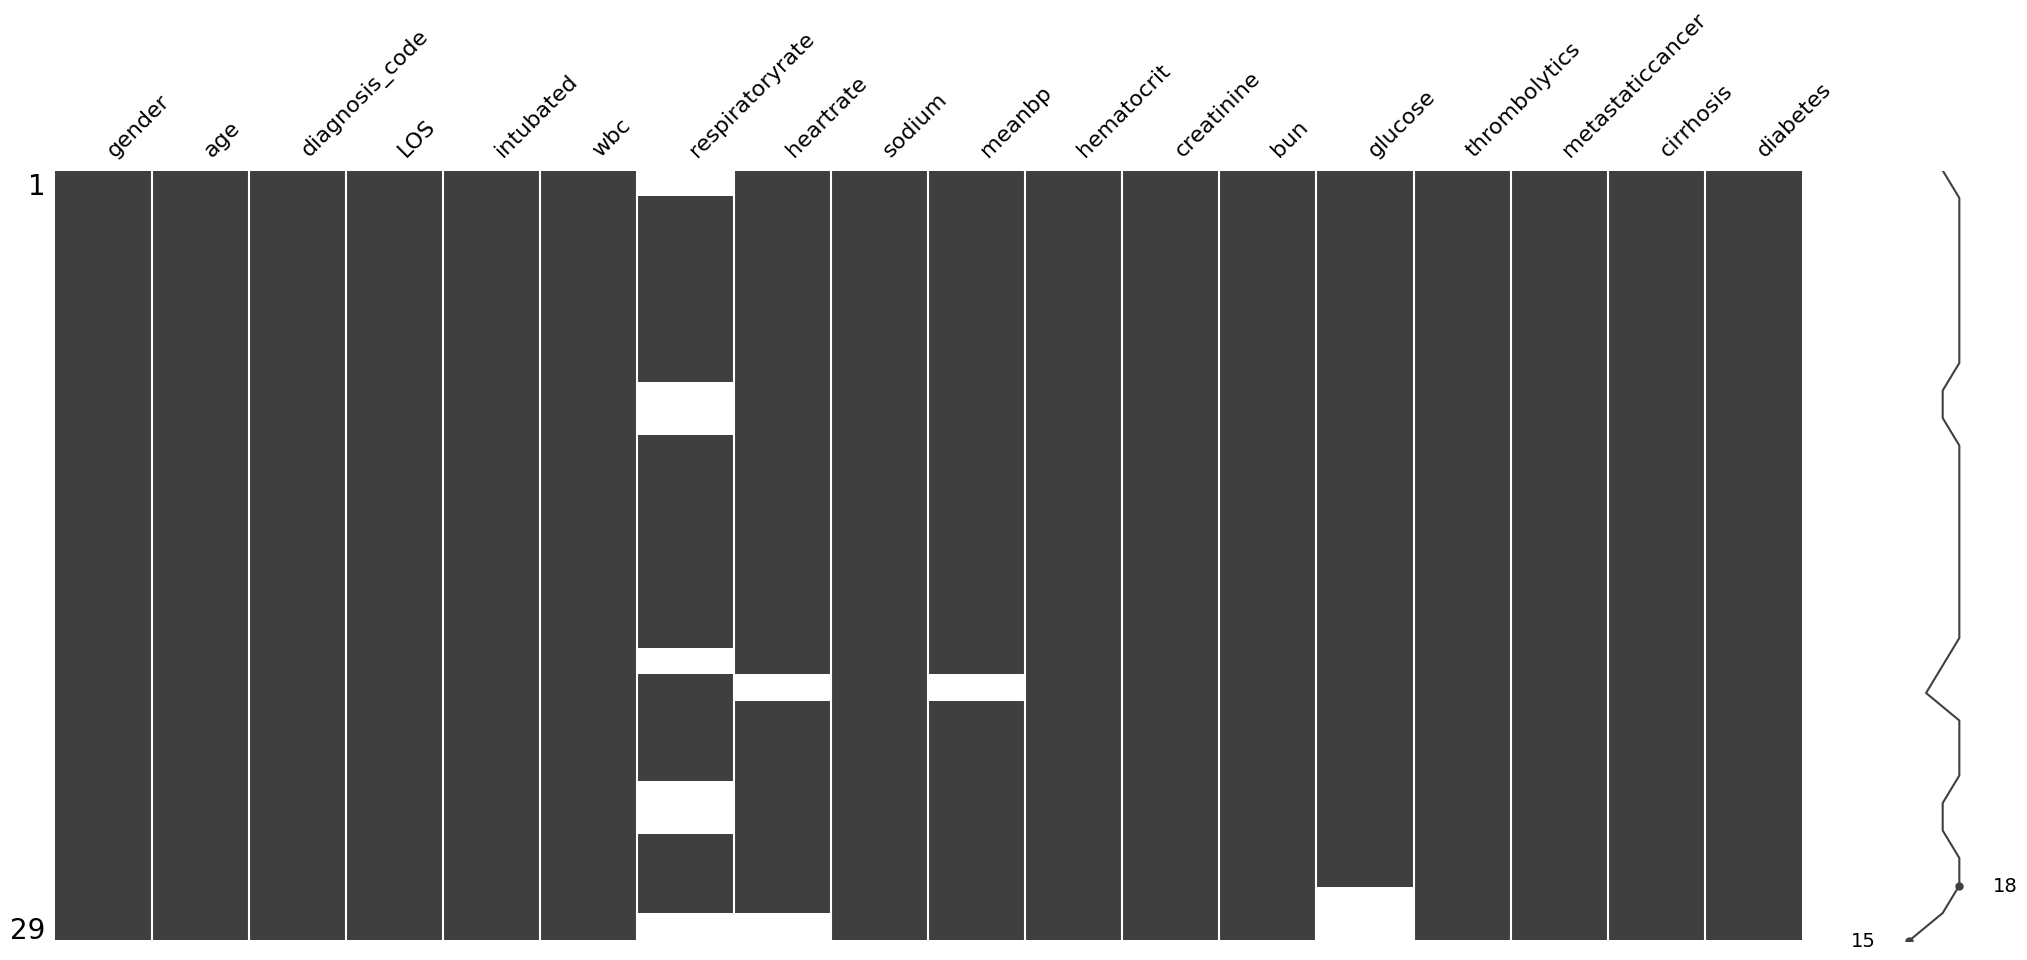

In [ ]:
msno.matrix(df_ppum.sort_values("glucose"));

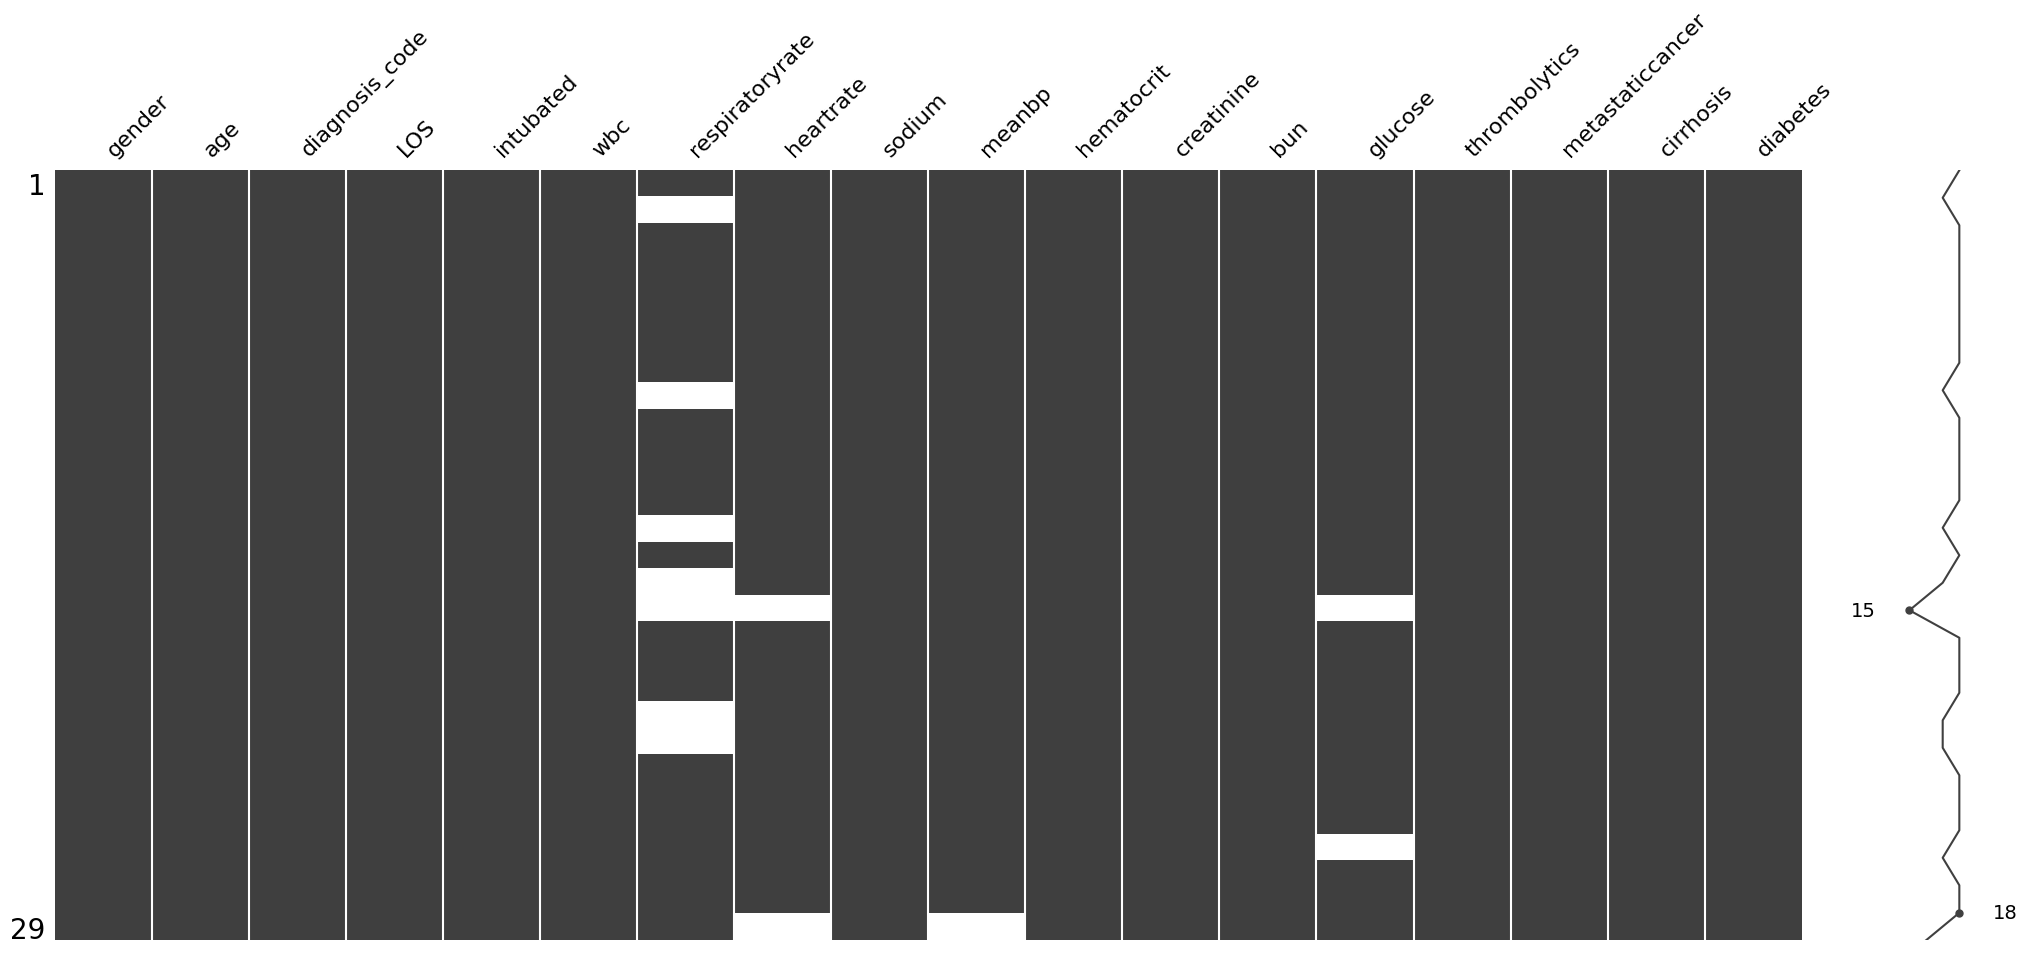

In [ ]:
msno.matrix(df_ppum.sort_values("meanbp"));

In [ ]:
# Drop NaN values from columns contain null values
columns_to_check = ['respiratoryrate', 'heartrate', 'meanbp', 'glucose']

df_ppum = df_ppum.dropna(subset=columns_to_check)

df_ppum.isnull().sum()

gender              0
age                 0
diagnosis_code      0
LOS                 0
intubated           0
wbc                 0
respiratoryrate     0
heartrate           0
sodium              0
meanbp              0
hematocrit          0
creatinine          0
bun                 0
glucose             0
thrombolytics       0
metastaticcancer    0
cirrhosis           0
diabetes            0
dtype: int64

## Compare Public data with PPUM data

In [ ]:
df_ppum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 6 to 69
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            20 non-null     int64  
 1   age               20 non-null     float64
 2   diagnosis_code    20 non-null     int64  
 3   LOS               20 non-null     float64
 4   intubated         20 non-null     float64
 5   wbc               20 non-null     float64
 6   respiratoryrate   20 non-null     float64
 7   heartrate         20 non-null     float64
 8   sodium            20 non-null     float64
 9   meanbp            20 non-null     float64
 10  hematocrit        20 non-null     float64
 11  creatinine        20 non-null     float64
 12  bun               20 non-null     float64
 13  glucose           20 non-null     float64
 14  thrombolytics     20 non-null     float64
 15  metastaticcancer  20 non-null     float64
 16  cirrhosis         20 non-null     float64
 17 

In [ ]:
df_cardiac_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13801 entries, 0 to 13800
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            13801 non-null  int64  
 1   age               13801 non-null  float64
 2   diagnosis_code    13801 non-null  int64  
 3   LOS               13801 non-null  float64
 4   intubated         13801 non-null  float64
 5   wbc               13801 non-null  float64
 6   respiratoryrate   13801 non-null  float64
 7   heartrate         13801 non-null  float64
 8   sodium            13801 non-null  float64
 9   meanbp            13801 non-null  float64
 10  hematocrit        13801 non-null  float64
 11  creatinine        13801 non-null  float64
 12  bun               13801 non-null  float64
 13  glucose           13801 non-null  float64
 14  thrombolytics     13801 non-null  float64
 15  metastaticcancer  13801 non-null  float64
 16  cirrhosis         13801 non-null  float6

In [ ]:
df_ppum.head()

,gender,age,diagnosis_code,LOS,intubated,wbc,respiratoryrate,heartrate,sodium,meanbp,hematocrit,creatinine,bun,glucose,thrombolytics,metastaticcancer,cirrhosis,diabetes
6,1,44.0,47,5.209028,0.0,11.5,16.0,93.0,138.0,118.333333,42.0,81.0,5.4,7.2,1.0,0.0,0.0,0.0
11,0,41.0,5,1.430556,0.0,10.2,16.0,74.0,138.0,90.000000,46.0,95.0,5.5,6.8,0.0,0.0,0.0,0.0
32,0,62.0,15,0.243056,0.0,6.3,19.0,100.0,138.0,85.666667,41.0,96.0,3.9,6.4,0.0,0.0,0.0,0.0
33,0,54.0,5,0.968056,0.0,13.3,19.0,82.0,136.0,98.333333,53.0,81.0,5.8,8.3,0.0,0.0,0.0,1.0
37,1,64.0,15,4.254167,0.0,17.8,17.0,70.0,137.0,93.000000,39.0,51.0,4.1,18.1,0.0,0.0,0.0,1.0


In [ ]:
df_ppum.describe(include='all')

,gender,age,diagnosis_code,LOS,intubated,wbc,respiratoryrate,heartrate,sodium,meanbp,hematocrit,creatinine,bun,glucose,thrombolytics,metastaticcancer,cirrhosis,diabetes
count,20.000000,20.000000,20.000000,20.000000,20.0,20.0000,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.0,20.000000
mean,0.400000,56.550000,12.300000,2.720833,0.0,8.7900,17.850000,80.150000,138.1500,103.550000,38.773000,79.700000,4.755000,7.380000,0.050000,0.0,0.0,0.450000
std,0.502625,13.052425,15.262958,2.979948,0.0,3.0982,1.565248,15.163235,1.7252,17.178892,10.167805,26.338085,1.400179,3.033775,0.223607,0.0,0.0,0.510418
min,0.000000,37.000000,5.000000,0.131250,0.0,5.2000,14.000000,56.000000,135.0000,71.666667,0.460000,44.000000,2.900000,4.500000,0.000000,0.0,0.0,0.000000
25%,0.000000,43.750000,5.000000,0.793576,0.0,6.0750,16.750000,69.500000,137.0000,92.750000,38.000000,57.750000,3.900000,5.725000,0.000000,0.0,0.0,0.000000
50%,0.000000,59.500000,5.000000,1.894097,0.0,8.4500,18.000000,81.000000,138.0000,99.166667,41.000000,79.000000,4.600000,6.750000,0.000000,0.0,0.0,0.000000
75%,1.000000,67.000000,7.500000,3.374479,0.0,10.2250,19.000000,87.000000,139.0000,115.833333,42.250000,94.250000,5.575000,7.850000,0.000000,0.0,0.0,1.000000
max,1.000000,74.000000,47.000000,12.720139,0.0,17.8000,20.000000,120.000000,142.0000,143.000000,53.000000,132.000000,8.500000,18.100000,1.000000,0.0,0.0,1.000000


In [ ]:
df_cardiac_ed.describe(include='all')

,gender,age,diagnosis_code,LOS,intubated,wbc,respiratoryrate,heartrate,sodium,meanbp,hematocrit,creatinine,bun,glucose,thrombolytics,metastaticcancer,cirrhosis,diabetes
count,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000
mean,0.438084,64.583364,29.021448,2.985273,0.155713,11.136074,25.049678,95.665459,137.739780,92.012269,35.181599,16.480731,28.696558,8.931063,0.057242,0.011159,0.012318,0.238678
std,0.496170,15.867244,17.787314,3.714468,0.362597,7.011856,14.869226,32.426198,5.761713,42.849547,6.795360,20.305575,24.622270,5.515682,0.232313,0.105047,0.110305,0.426291
min,0.000000,18.000000,0.000000,0.038194,0.000000,0.070000,4.000000,20.000000,99.000000,40.000000,7.700000,0.972419,2.000000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,54.000000,15.000000,1.087500,0.000000,7.180000,11.000000,61.000000,136.000000,55.000000,30.600000,6.983734,14.000000,5.300000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,65.000000,19.000000,1.850694,0.000000,9.500000,27.000000,101.000000,138.000000,70.000000,35.600000,9.724187,20.000000,6.900000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,77.000000,47.000000,3.260417,0.000000,13.340000,35.000000,118.000000,141.000000,129.000000,39.800000,16.089109,34.000000,11.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,90.000000,59.000000,98.013194,1.000000,189.700000,60.000000,199.000000,170.000000,200.000000,65.300000,220.562235,254.000000,82.000000,1.000000,1.000000,1.000000,1.000000


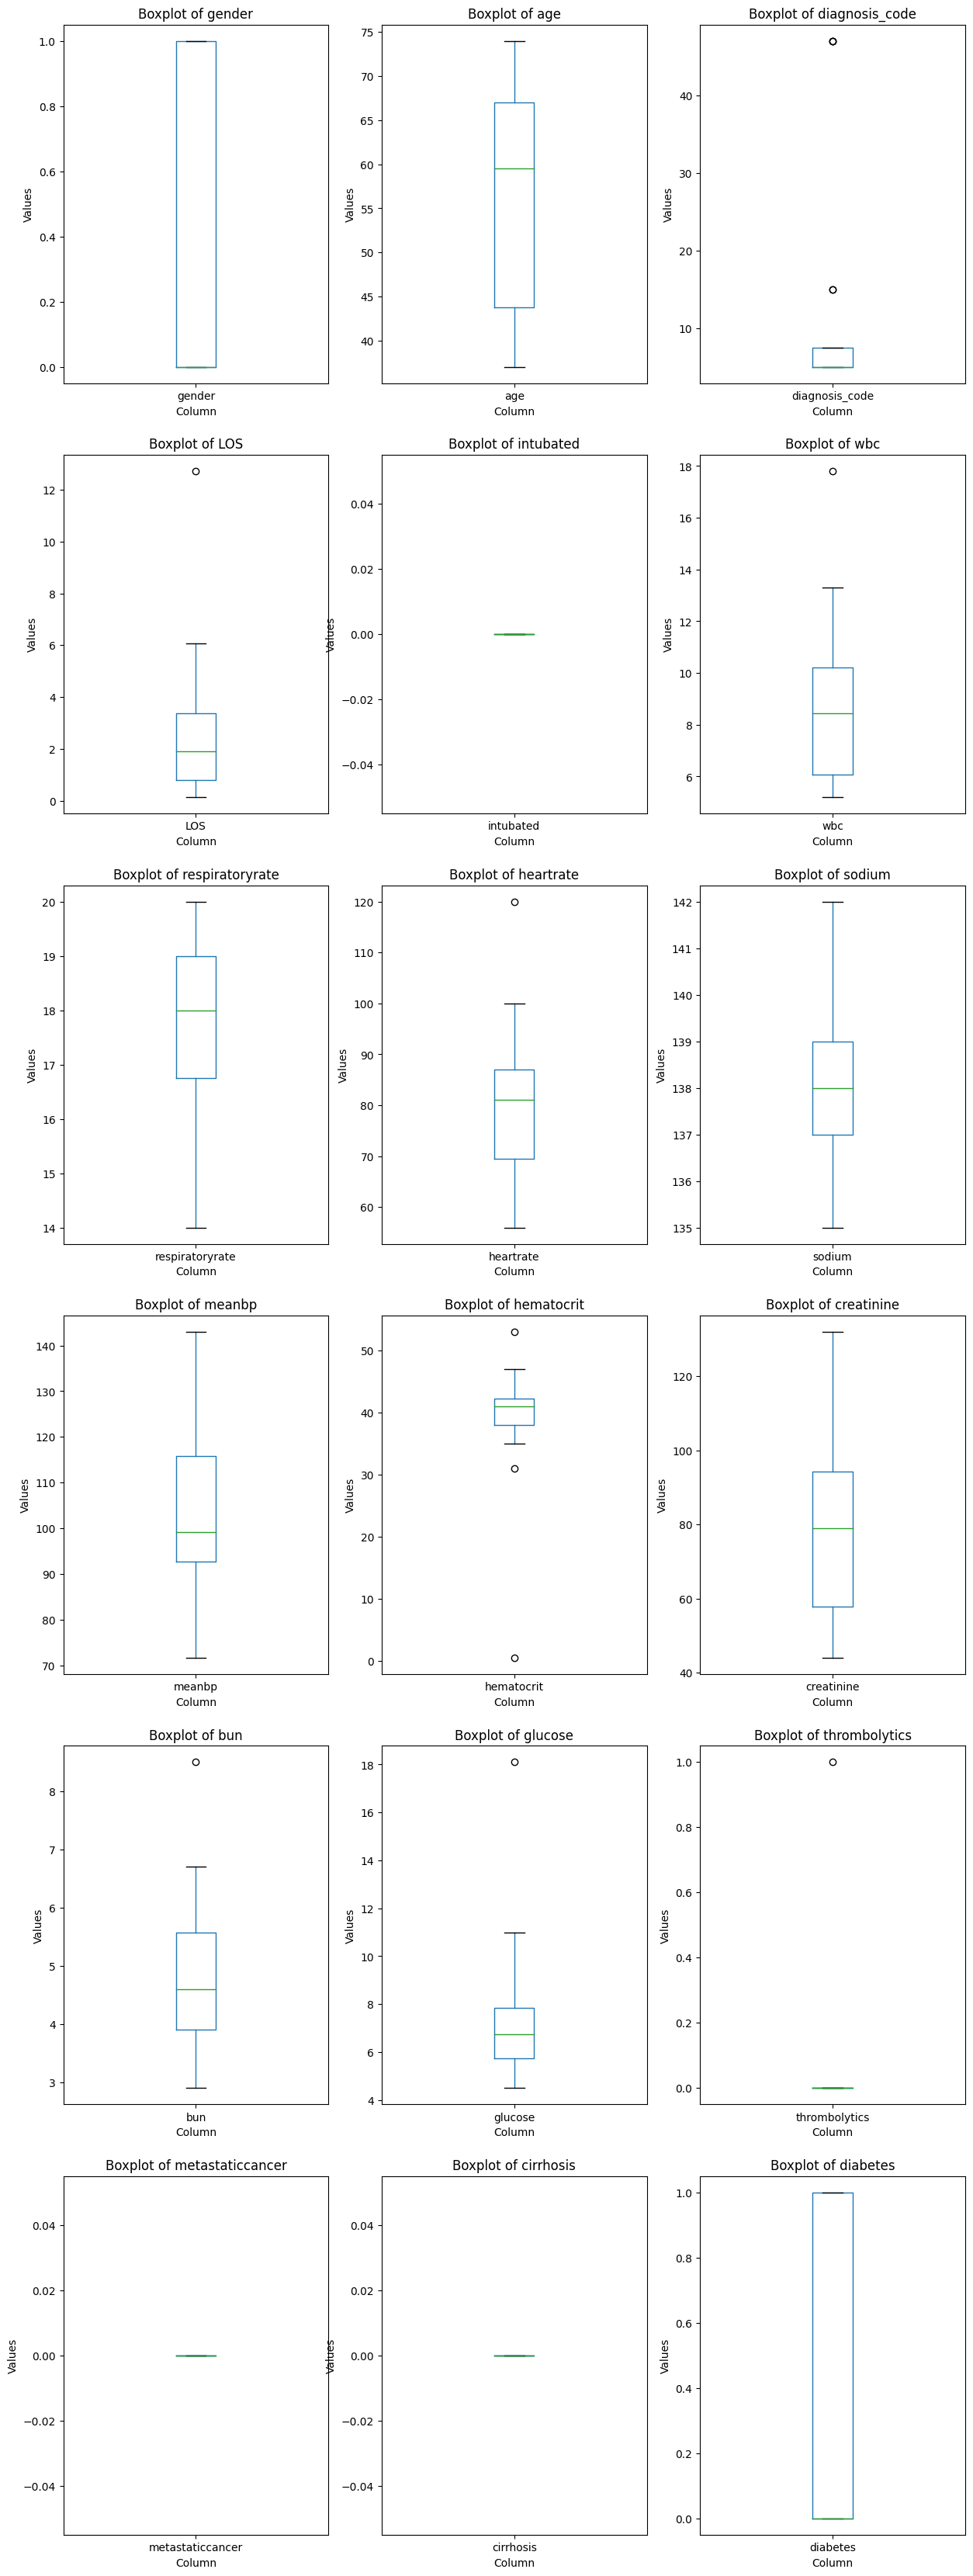

In [ ]:
# Select numeric columns only
numeric_columns = df_ppum.select_dtypes(include=['number']).columns

# Calculate number of rows needed for subplots
num_cols = len(numeric_columns)
num_rows = (num_cols // 3) + (num_cols % 3)

# Create boxplots for numeric columns
plt.figure(figsize=(15, 7 * num_rows))
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(num_rows, 3, i)
    df_ppum.boxplot(column=[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')
    plt.xlabel('Column')
    plt.grid(False)

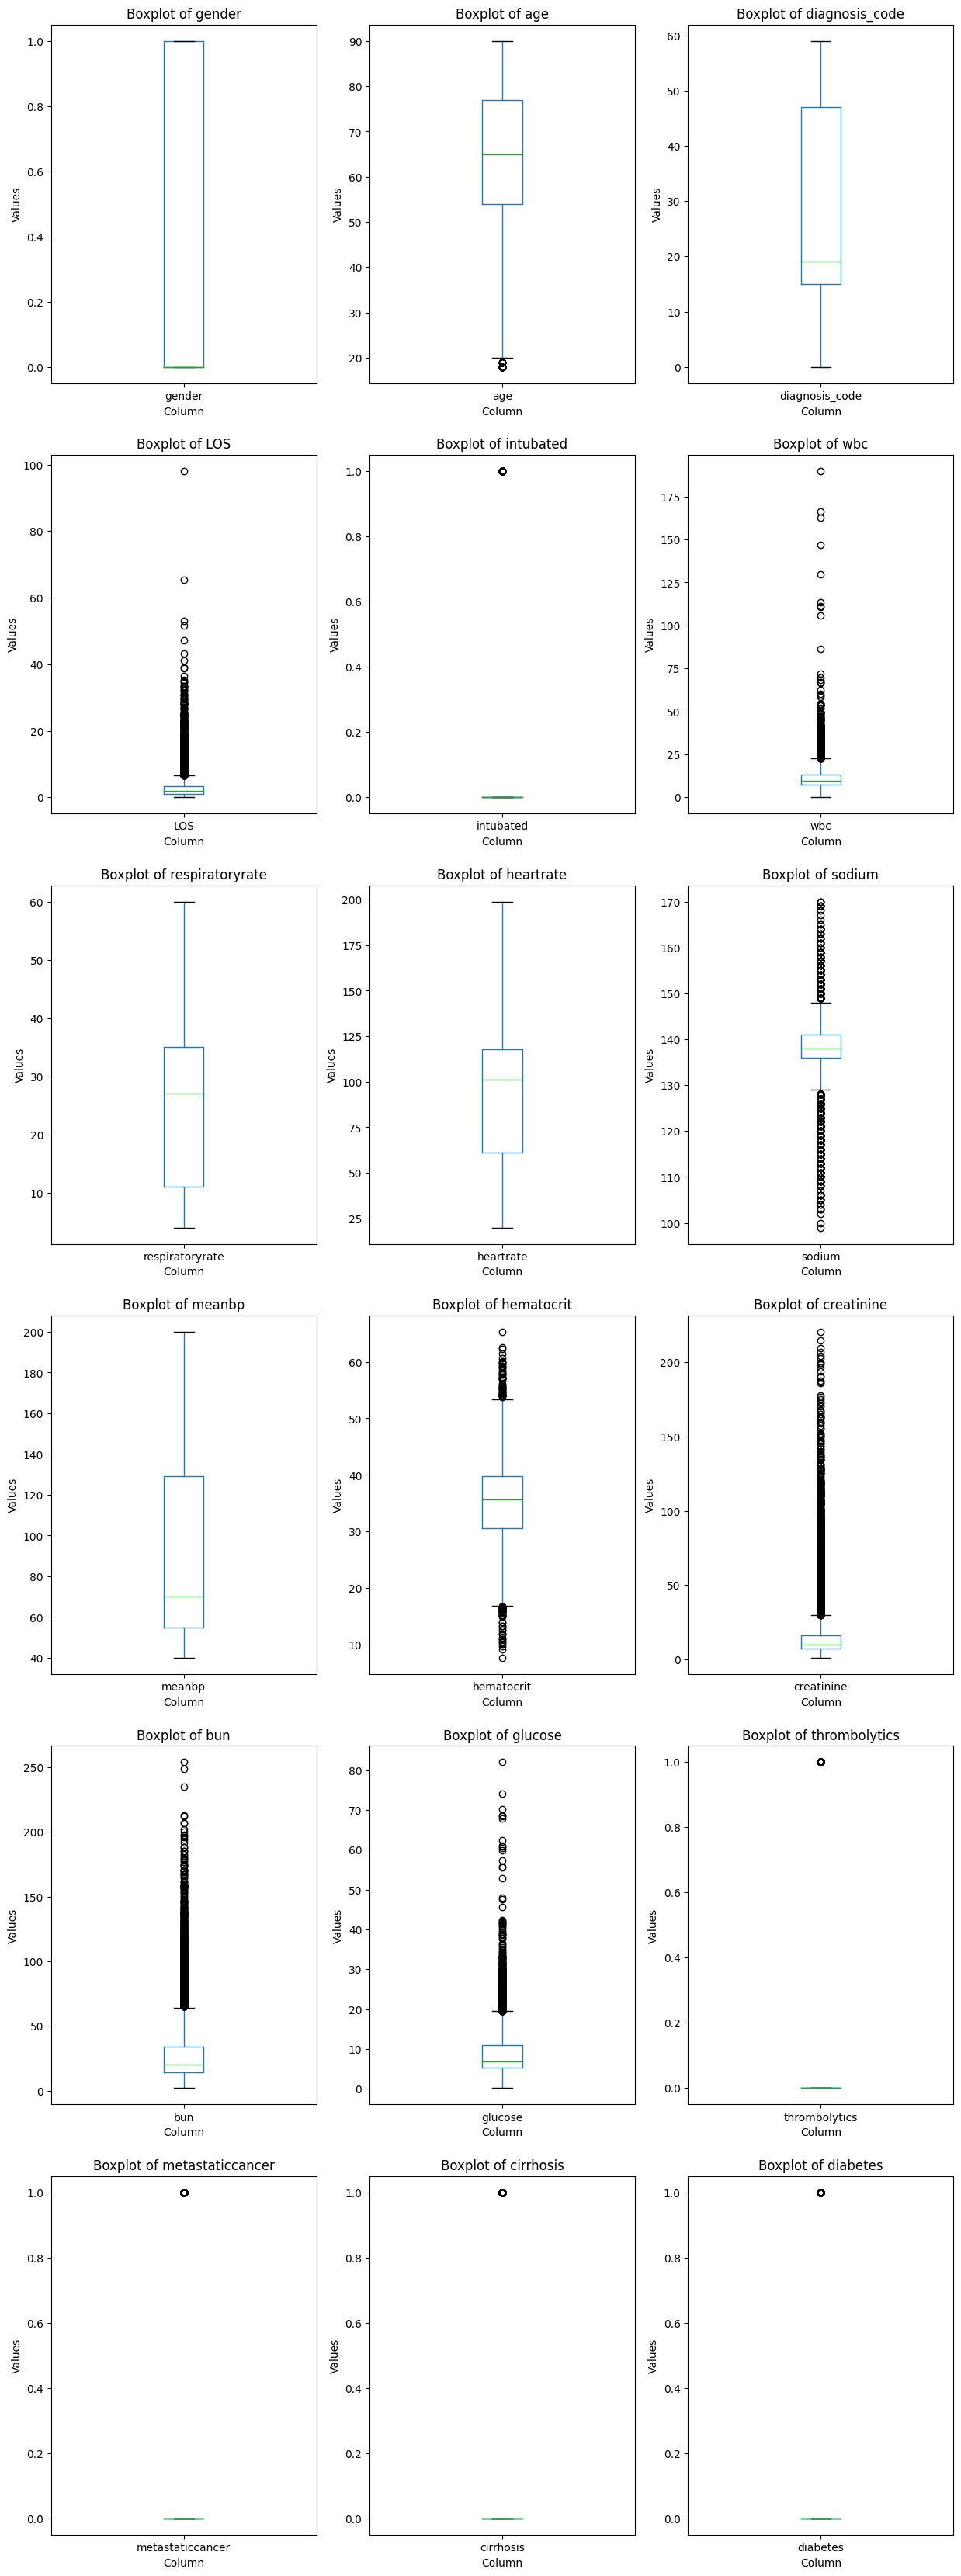

In [ ]:
# Select numeric columns only
numeric_columns = df_cardiac_ed.select_dtypes(include=['number']).columns

# Calculate number of rows needed for subplots
num_cols = len(numeric_columns)
num_rows = (num_cols // 3) + (num_cols % 3)

# Create boxplots for numeric columns
plt.figure(figsize=(15, 7 * num_rows))
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(num_rows, 3, i)
    df_cardiac_ed.boxplot(column=[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')
    plt.xlabel('Column')
    plt.grid(False)

In [ ]:
df_ppum

,gender,age,diagnosis_code,LOS,intubated,wbc,respiratoryrate,heartrate,sodium,meanbp,hematocrit,creatinine,bun,glucose,thrombolytics,metastaticcancer,cirrhosis,diabetes
6,1,44.0,47,5.209028,0.0,11.5,16.0,93.0,138.0,118.333333,42.00,81.0,5.4,7.2,1.0,0.0,0.0,0.0
11,0,41.0,5,1.430556,0.0,10.2,16.0,74.0,138.0,90.000000,46.00,95.0,5.5,6.8,0.0,0.0,0.0,0.0
32,0,62.0,15,0.243056,0.0,6.3,19.0,100.0,138.0,85.666667,41.00,96.0,3.9,6.4,0.0,0.0,0.0,0.0
33,0,54.0,5,0.968056,0.0,13.3,19.0,82.0,136.0,98.333333,53.00,81.0,5.8,8.3,0.0,0.0,0.0,1.0
37,1,64.0,15,4.254167,0.0,17.8,17.0,70.0,137.0,93.000000,39.00,51.0,4.1,18.1,0.0,0.0,0.0,1.0
44,1,57.0,5,2.586111,0.0,11.1,16.0,80.0,141.0,108.666667,35.00,58.0,4.6,6.9,0.0,0.0,0.0,0.0
46,1,65.0,5,0.158333,0.0,9.4,18.0,65.0,138.0,96.000000,42.00,51.0,3.9,8.4,0.0,0.0,0.0,1.0
47,1,39.0,5,0.270139,0.0,6.1,18.0,90.0,138.0,124.666667,41.00,57.0,4.6,5.5,0.0,0.0,0.0,0.0
50,0,37.0,5,0.131250,0.0,9.1,19.0,86.0,136.0,122.666667,43.00,77.0,3.6,5.8,0.0,0.0,0.0,0.0
53,1,43.0,5,0.267361,0.0,5.6,20.0,120.0,139.0,115.000000,40.00,44.0,4.6,4.8,0.0,0.0,0.0,0.0


In [ ]:
# df_ppum.to_excel('cardiac_ed_ppum_test.xlsx', index=False, header=True)

# from google.colab import files

# files.download('cardiac_ed_ppum_test.xlsx')

In [ ]:
test_ppum = test_ppum.dropna()

In [ ]:
test_ppum

,gender,age,diagnosis_code,LOS,intubated,wbc,respiratoryrate,heartrate,sodium,meanbp,hematocrit,creatinine,bun,glucose,thrombolytics,metastaticcancer,cirrhosis,diabetes
1,0.0,41.0,5.0,1.430556,0.0,10.2,16.0,74.0,138.0,90.000000,46.00,95.0,5.5,6.8,0.0,0.0,0.0,0.0
3,0.0,54.0,5.0,0.968056,0.0,13.3,19.0,82.0,136.0,98.333333,53.00,81.0,5.8,8.3,0.0,0.0,0.0,1.0
5,1.0,57.0,5.0,2.586111,0.0,11.1,16.0,80.0,141.0,108.666667,35.00,58.0,4.6,6.9,0.0,0.0,0.0,0.0
10,1.0,43.0,5.0,1.804167,0.0,6.0,19.0,83.0,137.0,108.000000,38.00,44.0,3.0,6.7,0.0,0.0,0.0,0.0
11,0.0,44.0,47.0,1.642361,0.0,8.2,18.0,83.0,139.0,96.666667,43.00,66.0,2.9,6.6,0.0,0.0,0.0,0.0
12,0.0,73.0,5.0,1.984028,0.0,5.6,20.0,71.0,142.0,86.000000,38.00,69.0,5.8,7.7,0.0,0.0,0.0,0.0
13,0.0,73.0,5.0,2.284722,0.0,9.1,18.0,82.0,137.0,100.000000,35.00,124.0,6.3,11.0,0.0,0.0,0.0,1.0
14,0.0,65.0,5.0,1.693056,0.0,8.6,18.0,56.0,137.0,93.333333,41.00,94.0,4.6,5.1,0.0,0.0,0.0,1.0
18,0.0,70.0,5.0,2.006944,0.0,6.0,14.0,68.0,140.0,71.666667,0.46,94.0,4.2,4.5,0.0,0.0,0.0,1.0


In [ ]:
test_ppum.to_csv('cardiac_ed_ppum_viva.csv', index=False, header=True)

from google.colab import files

files.download('cardiac_ed_ppum_viva.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Export Dataset

In [ ]:
# df_ppum.to_csv('cardiac_ed_ppum.csv', index=False, header=True)

# from google.colab import files

# files.download('cardiac_ed_ppum.csv')

## Adjust the skewness of the LOS column

In [ ]:
from scipy.stats import skew

# See the skewness of the LOS column
target_skewness = skew(df_cardiac_ed['LOS'])
print("Skewness:", target_skewness)

Skewness: 5.281137022886127


In [ ]:
from scipy.stats import skew

# See the skewness of the LOS column
target_skewness = skew(df_ppum_cleaned['LOS'])
print("Skewness:", target_skewness)

Skewness: 2.0204703614021873


inference:
- It's positively skewed

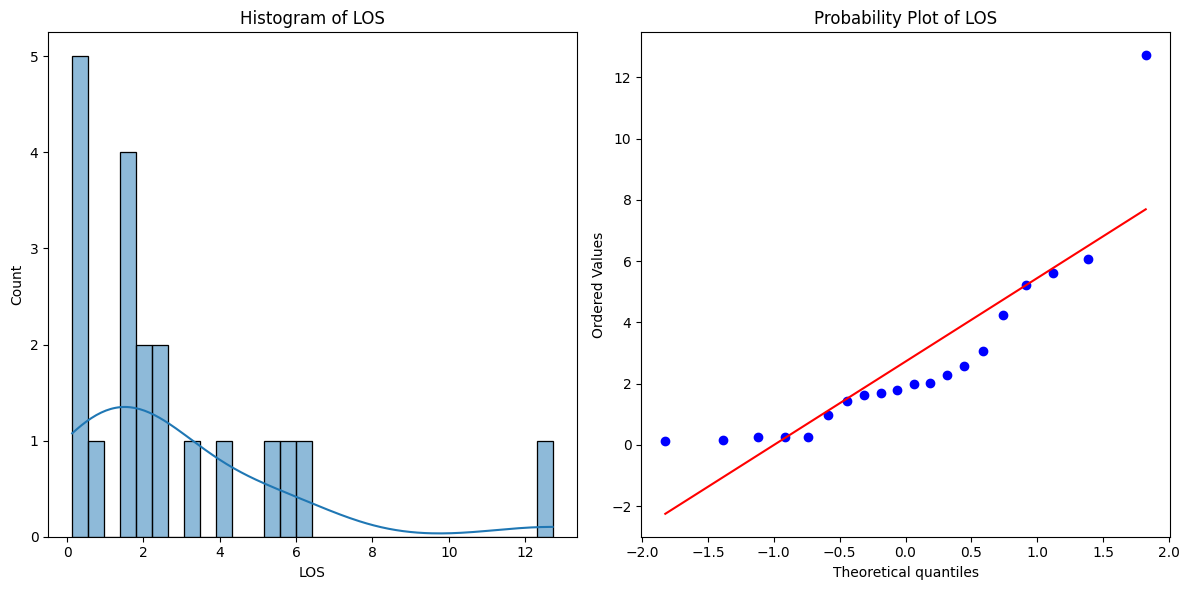

In [ ]:
from scipy.stats import probplot

plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_ppum_cleaned['LOS'], bins=30, kde=True)
plt.title('Histogram of LOS')

# Probability plot
plt.subplot(1, 2, 2)
probplot(df_ppum_cleaned['LOS'], plot=plt)
plt.title('Probability Plot of LOS')

plt.tight_layout()
plt.show()

In [ ]:
# make a copy of the 2 different dataset with a skew LOS column
df_cardiac_ed_skew = df_cardiac_ed.copy()
df_ppum_cleaned_skew = df_ppum_cleaned.copy()
df_cardiac_ed_no_outliers_skew = df_cardiac_ed_no_outliers.copy()
df_cardiac_ed_quantile_skew = df_cardiac_ed_quantile.copy()

In [ ]:
# Create 'LOS_log' column with log-transformed LOS data
df_cardiac_ed_skew['LOS_log'] = np.log1p(df_cardiac_ed_skew['LOS'])
df_ppum_cleaned_skew['LOS_log'] = np.log1p(df_ppum_cleaned_skew['LOS'])
df_cardiac_ed_no_outliers_skew['LOS_log'] = np.log1p(df_cardiac_ed_no_outliers_skew['LOS'])
df_cardiac_ed_quantile_skew['LOS_log'] = np.log1p(df_cardiac_ed_quantile_skew['LOS'])

In [ ]:
# Remove 'LOS' column
df_cardiac_ed_skew = df_cardiac_ed_skew.drop(['LOS'], axis=1)
df_ppum_cleaned_skew = df_ppum_cleaned_skew.drop(['LOS'], axis=1)
df_cardiac_ed_no_outliers_skew = df_cardiac_ed_no_outliers_skew.drop(['LOS'], axis=1)
df_cardiac_ed_quantile_skew = df_cardiac_ed_quantile_skew.drop(['LOS'], axis=1)

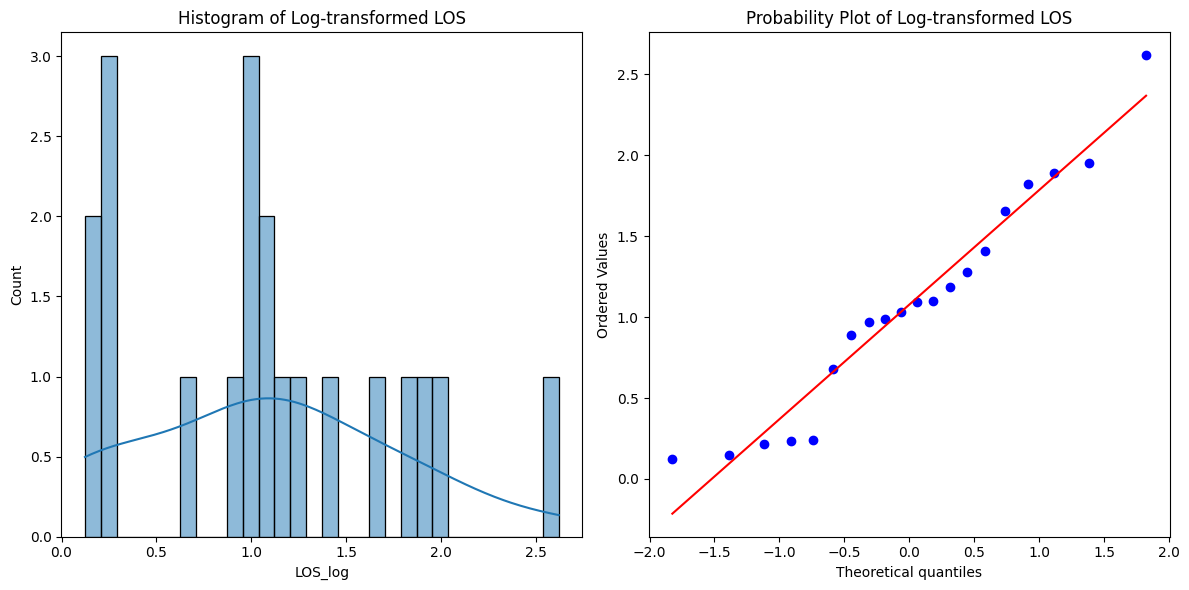

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram of log-transformed LOS
plt.subplot(1, 2, 1)
sns.histplot(df_ppum_cleaned_skew['LOS_log'], bins=30, kde=True)
plt.title('Histogram of Log-transformed LOS')

# Probability plot of log-transformed LOS
plt.subplot(1, 2, 2)
probplot(df_ppum_cleaned_skew['LOS_log'], plot=plt)
plt.title('Probability Plot of Log-transformed LOS')

plt.tight_layout()
plt.show()

In [ ]:
df_ppum_cleaned_skew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            20 non-null     int64  
 1   age               20 non-null     float64
 2   diagnosis_code    20 non-null     int64  
 3   intubated         20 non-null     float64
 4   wbc               20 non-null     float64
 5   respiratoryrate   20 non-null     float64
 6   heartrate         20 non-null     float64
 7   sodium            20 non-null     float64
 8   meanbp            20 non-null     float64
 9   hematocrit        20 non-null     float64
 10  creatinine        20 non-null     float64
 11  bun               20 non-null     float64
 12  glucose           20 non-null     float64
 13  thrombolytics     20 non-null     float64
 14  metastaticcancer  20 non-null     float64
 15  cirrhosis         20 non-null     float64
 16  diabetes          20 non-null     float64
 17 

## Deep Learning with PPUM dataset

In [ ]:
# Splitting the data into features and target variable
X = df_cardiac_ed_skew.drop(["LOS_log"], axis=1)
y = df_cardiac_ed_skew["LOS_log"]
numeric_columns = X.select_dtypes(include=np.number).columns.tolist()  # Numeric columns for scaling
columns = X.columns.tolist()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create an RBM
def create_rbm(input_size, output_size):
    rbm_model = tf.keras.models.Sequential()
    rbm_model.add(tf.keras.layers.Dense(output_size, activation='sigmoid', input_shape=(input_size,)))
    rbm_model.add(tf.keras.layers.Dense(input_size, activation='sigmoid'))
    rbm_model.compile(optimizer='adam', loss='mean_squared_error')
    return rbm_model

def pretrain_dbn_layers(X_train, layers):
    rbms = []
    input_size = X_train.shape[1]
    train_data = X_train.copy()  # Create a copy to maintain original data
    for i in range(layers):
        rbm = create_rbm(input_size, 17)  # the number of neurons
        rbm.fit(train_data, train_data, epochs=10, batch_size=32)  # Pretraining each layer
        rbms.append(rbm)
        train_data = rbm.predict(train_data)  # Use the hidden layer activations for the next RBM
    return rbms

# Create and train the RBMs
rbms = pretrain_dbn_layers(X_train, 3)  # Creating a DBN with 3 RBM layers

# Construct the DBN model
dbn_model = tf.keras.models.Sequential()
for rbm in rbms:
    dbn_model.add(rbm.layers[0])  # Add the hidden layer of each RBM

# Add an output layer for regression
dbn_model.add(tf.keras.layers.Dense(1))  # Example output layer, modify based on your task

# Compile the DBN model
dbn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
print("Training DBN model")
dbn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluation for all models
loss_dbn, mae_dbn, mse_dbn = dbn_model.evaluate(X_test, y_test)
rmse_dbn = np.sqrt(mse_dbn)

print("\nDBN Test Loss:", loss_dbn)
print("DBN MSE:", mse_dbn)
print("DBN RMSE:", rmse_dbn)
print("DBN MAE:", mae_dbn)

Epoch 1/10
345/345 [==============================] - 3s 2ms/step - loss: 0.0833
Epoch 2/10
345/345 [==============================] - 1s 2ms/step - loss: 0.0524
Epoch 3/10
345/345 [==============================] - 1s 2ms/step - loss: 0.0442
Epoch 4/10
345/345 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 5/10
345/345 [==============================] - 1s 2ms/step - loss: 0.0284
Epoch 6/10
345/345 [==============================] - 1s 2ms/step - loss: 0.0227
Epoch 7/10
345/345 [==============================] - 1s 2ms/step - loss: 0.0184
Epoch 8/10
345/345 [==============================] - 1s 2ms/step - loss: 0.0149
Epoch 9/10
345/345 [==============================] - 1s 2ms/step - loss: 0.0119
Epoch 10/10
345/345 [==============================] - 1s 1ms/step
Epoch 1/10
345/345 [==============================] - 2s 3ms/step - loss: 0.0578
Epoch 2/10
345/345 [==============================] - 1s 3ms/step - loss: 0.0304
Epoch 3/10
345/345 [======================

In [ ]:
# Splitting the data into features and target variable
X = df_cardiac_ed_skew.drop(["LOS_log"], axis=1)
y = df_cardiac_ed_skew["LOS_log"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create an RBM
def create_rbm(input_size, output_size, activation='sigmoid'):
    rbm_model = tf.keras.models.Sequential()
    rbm_model.add(tf.keras.layers.Dense(output_size, activation=activation, input_shape=(input_size,)))
    rbm_model.add(tf.keras.layers.Dense(input_size, activation=activation))
    rbm_model.compile(optimizer='adam', loss='mean_squared_error')
    return rbm_model

def pretrain_dbn_layers(X_train, layers, layer_size, activation):
    rbms = []
    input_size = X_train.shape[1]
    train_data = X_train.copy()  # Create a copy to maintain original data
    for i in range(layers):
        rbm = create_rbm(input_size, layer_size, activation)
        rbm.fit(train_data, train_data, epochs=10, batch_size=32)  # Pretraining each layer
        rbms.append(rbm)
        train_data = rbm.predict(train_data)  # Use the hidden layer activations for the next RBM
    return rbms

# Function to create DBN model with specified parameters including Dropout and Regularization
def create_dbn(num_layers, layer_size, activation, dropout_rate, regularization):
    dbn_model = tf.keras.models.Sequential()
    for i in range(num_layers):
        if i == 0:
            dbn_model.add(tf.keras.layers.Dense(layer_size, activation=activation, input_shape=(X_train.shape[1],)))
        else:
            dbn_model.add(tf.keras.layers.Dense(layer_size, activation=activation))
        if dropout_rate > 0:
            dbn_model.add(tf.keras.layers.Dropout(dropout_rate))
        if regularization == 'l1':
            dbn_model.add(tf.keras.layers.Dense(layer_size, activation=activation, kernel_regularizer=tf.keras.regularizers.l1()))
        elif regularization == 'l2':
            dbn_model.add(tf.keras.layers.Dense(layer_size, activation=activation, kernel_regularizer=tf.keras.regularizers.l2()))
    dbn_model.add(tf.keras.layers.Dense(1))  # Output layer for regression
    return dbn_model

# Fixed Parameters
layer_size = 17

# {'learning_rate': 0.001, 'batch_size': 16, 'num_epochs': 150,
#  'num_layers': 2, 'activation_function': 'elu', 'dropout_rate': 0.1, 'regularization_type': 'l2'}
# Use the best parameters obtained from Optuna 32 100
best_params = {'learning_rate': 0.001, 'batch_size': 16, 'num_epochs': 150,
               'num_layers': 2, 'activation_function': 'elu', 'dropout_rate': 0.1, 'regularization_type': 'l2'}

# RBM-Based Pretraining
rbms = pretrain_dbn_layers(X_train, best_params['num_layers'], layer_size, best_params['activation_function'])

# Construct the DBN model using RBMs
dbn_model = tf.keras.models.Sequential()
for rbm in rbms:
    dbn_model.add(rbm.layers[0])

dbn_model = create_dbn(best_params['num_layers'], layer_size, best_params['activation_function'],
                       best_params['dropout_rate'], best_params['regularization_type'])

# Compile and train the DBN model with the best parameters
optimizer = tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate'])
dbn_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])
dbn_model.fit(X_train, y_train, epochs=best_params['num_epochs'], batch_size=best_params['batch_size'])

# Evaluate the model
loss, mae, mse = dbn_model.evaluate(X_test, y_test)

# Calculate RMSE manually for test data
rmse = np.sqrt(mse)

print("Test Loss:", loss)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

Epoch 1/10
345/345 [==============================] - 2s 2ms/step - loss: 0.0686
Epoch 2/10
345/345 [==============================] - 1s 2ms/step - loss: 0.0128
Epoch 3/10
345/345 [==============================] - 1s 2ms/step - loss: 0.0053
Epoch 4/10
345/345 [==============================] - 1s 2ms/step - loss: 0.0024
Epoch 5/10
345/345 [==============================] - 1s 2ms/step - loss: 0.0015
Epoch 6/10
345/345 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 7/10
345/345 [==============================] - 1s 2ms/step - loss: 8.2877e-04
Epoch 8/10
345/345 [==============================] - 1s 2ms/step - loss: 6.1269e-04
Epoch 9/10
345/345 [==============================] - 1s 2ms/step - loss: 4.3334e-04
Epoch 10/10
345/345 [==============================] - 1s 1ms/step
Epoch 1/10
345/345 [==============================] - 1s 2ms/step - loss: 0.0621
Epoch 2/10
345/345 [==============================] - 1s 2ms/step - loss: 0.0105
Epoch 3/10
345/345 [==========

In [ ]:
# save the scaler object

# import pickle

# # save the scaler object
# with open('dl_scaler.pkl', 'wb') as file:
#   pickle.dump(scaler, file)

In [ ]:
# save the model
# dbn_model.save('dbn_model.h5')

In [ ]:
# load the scaler object
import pickle

with open("drive/My Drive/FYP_LOS/dataset/dl_scaler.pkl", 'rb') as file:
    scaler = pickle.load(file)

# Load the saved model
# dbn_model = tf.keras.models.load_model('drive/My Drive/FYP_LOS/dataset/dbn_model.h5')

In [ ]:
# Splitting the new data into features and target variable
X_new = df_ppum_cleaned_skew.drop(["LOS_log"], axis=1)
y_new = df_ppum_cleaned_skew["LOS_log"]

# Scaling the features data for the new data
X_new = scaler.transform(X_new)

# Make predictions using the trained DBN model
predictions = dbn_model.predict(X_new)

# Evaluate the predictions on the new data
loss_new, mae_new, mse_new = dbn_model.evaluate(X_new, y_new)
rmse_new = np.sqrt(mse_new)

print("\nNew Data Test Loss:", loss_new)
print("New Data MSE:", mse_new)
print("New Data RMSE:", rmse_new)
print("New Data MAE:", mae_new)

1/1 [==============================] - 0s 24ms/step - loss: 0.4910 - mae: 0.5393 - mse: 0.4899

New Data Test Loss: 0.49098214507102966
New Data MSE: 0.489881694316864
New Data RMSE: 0.6999154908393327
New Data MAE: 0.5392827391624451


In [ ]:
y_new

0     1.826004
1     0.888120
2     0.217573
3     0.677046
4     1.659021
5     1.277068
6     0.146982
7     0.239126
8     0.123323
9     0.236937
10    1.031106
11    0.971673
12    1.093274
13    1.189282
14    0.990676
15    1.954799
16    1.406403
17    1.890011
18    1.100924
19    2.618865
Name: LOS_log, dtype: float64

In [ ]:
predictions

array([[0.8352329 ],
       [0.92985666],
       [0.9552102 ],
       [0.9520836 ],
       [1.1093683 ],
       [1.0661894 ],
       [0.99961126],
       [0.9670197 ],
       [0.9678645 ],
       [1.0323801 ],
       [0.9988897 ],
       [0.81261826],
       [0.999174  ],
       [0.9902222 ],
       [0.93027866],
       [0.9628267 ],
       [1.0245401 ],
       [0.783465  ],
       [1.1591358 ],
       [0.94285464]], dtype=float32)

In [ ]:
# unlog the 'y_new' & predictions value
y_new_log = np.expm1(y_new)
predictions_log = np.expm1(predictions)

In [ ]:
y_new_log

0      5.209028
1      1.430556
2      0.243056
3      0.968056
4      4.254167
5      2.586111
6      0.158333
7      0.270139
8      0.131250
9      0.267361
10     1.804167
11     1.642361
12     1.984028
13     2.284722
14     1.693056
15     6.062500
16     3.081250
17     5.619444
18     2.006944
19    12.720139
Name: LOS_log, dtype: float64

In [ ]:
predictions_log

array([[1.3053509],
       [1.5341458],
       [1.5992169],
       [1.5911028],
       [2.0324423],
       [1.9042914],
       [1.7172253],
       [1.6300943],
       [1.6323172],
       [1.8077407],
       [1.7152653],
       [1.2538013],
       [1.7160375],
       [1.6918325],
       [1.5352156],
       [1.6190895],
       [1.7858138],
       [1.1890442],
       [2.1871777],
       [1.5672997]], dtype=float32)

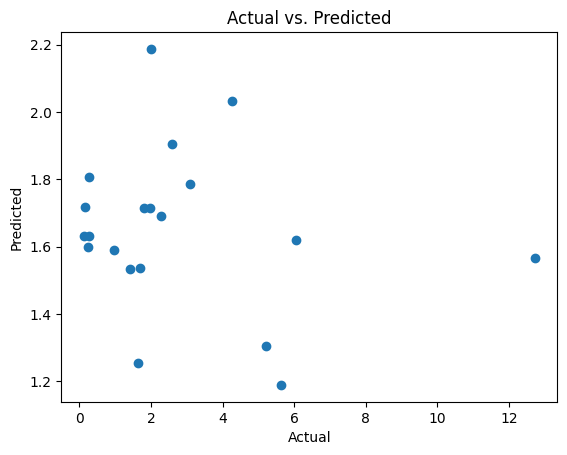

In [ ]:
# Scatter plot comparing predicted and actual values
plt.scatter(y_new_log, predictions_log)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [ ]:
# Select a single row from df_ppum
single_row = df_ppum_cleaned_skew.iloc[13]

# Extract features and target column (LOS)
X_single = single_row.drop("LOS_log")
y_single = single_row["LOS_log"]

# Preprocess the single row (assuming similar preprocessing to the training data)
X_single_numeric = X_single[numeric_columns]  # Select numeric columns
X_single_scaled = scaler.transform([X_single_numeric])  # Scale the features

# Reshape the single row for DBN
X_single_reshaped_dbn = X_single_scaled.reshape(1, -1)  # Reshape as a single sample

# Make prediction on the single row
predicted_los = dbn_model.predict(X_single_reshaped_dbn)

# unlog the log column
y_single_unlog = np.expm1(y_single)
predicted_los_unlog = np.expm1(predicted_los)

# Display the predicted LOS and the actual LOS value
print("Predicted LOS:", predicted_los_unlog[0][0])
print("Actual LOS:", y_single_unlog)

1/1 [==============================] - 0s 42ms/step
Predicted LOS: 1.6918325
Actual LOS: 2.2847222222222223


In [ ]:
# Select a single row from df_ppum
single_row = df_cardiac_ed_skew.iloc[10]

# Extract features and target column (LOS)
X_single = single_row.drop("LOS_log")
y_single = single_row["LOS_log"]

# Preprocess the single row (assuming similar preprocessing to the training data)
X_single_numeric = X_single[numeric_columns]  # Select numeric columns
X_single_scaled = scaler.transform([X_single_numeric])  # Scale the features

# Reshape the single row for DBN
X_single_reshaped_dbn = X_single_scaled.reshape(1, -1)  # Reshape as a single sample

# Make prediction on the single row
predicted_los = dbn_model.predict(X_single_reshaped_dbn)

# unlog the log column
y_single_unlog = np.expm1(y_single)
predicted_los_unlog = np.expm1(predicted_los)

# Display the predicted LOS and the actual LOS value
print("Predicted LOS:", predicted_los_unlog[0][0])
print("Actual LOS:", y_single_unlog)

1/1 [==============================] - 0s 16ms/step
Predicted LOS: 2.790867
Actual LOS: 2.479166666666666
